# Housing Prices


This is my second attempt at Housing Prices. I got pretty much lost in the first one but I learnt quite a few things. Even though I had poor results, it was good for skillup.


In [2]:
#Basic libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loadint data
data=pd.read_csv("../Housing Prices/train.csv")
testdata=pd.read_csv("../Housing Prices/test.csv")
data.shape

(1460, 81)

In [3]:
# data.

In [4]:
#lets fill nans
# data.isna().sum()
cont_features=[]
cat_features=[]
data.drop('Id',axis=1,inplace=True)
for col in data.columns:
    if data[col].dtype=='int64' or data[col].dtype=='float64':
        cont_features.append(col)
        data[col].fillna(data[col].median(),inplace=True)
    else:
        cat_features.append(col)
        data[col].fillna(data[col].value_counts().idxmax(),inplace=True)

In [5]:
# testdata['SalePrice']=1
# data=pd.concat([data,testdata],axis=0)
# data.shape

In [6]:
# testdata.isna().sum()

/home/charlie/environments/PFDS/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


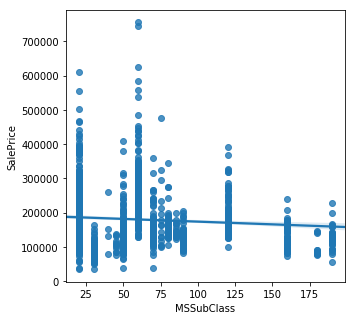

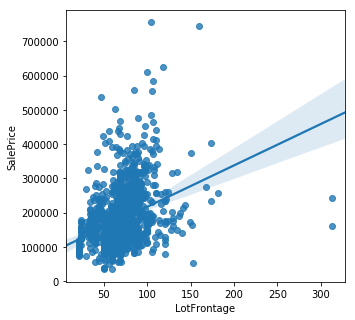

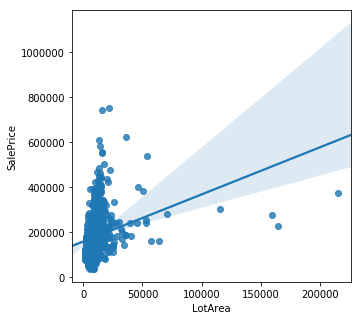

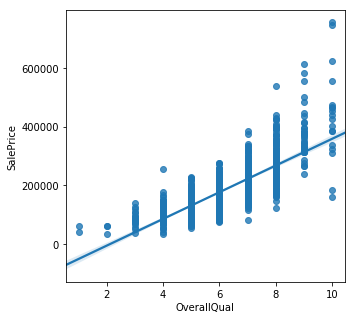

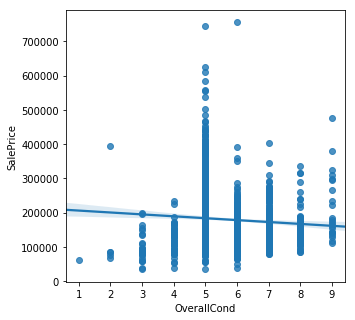

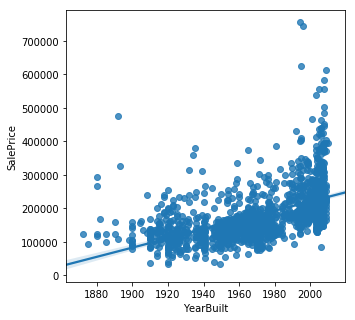

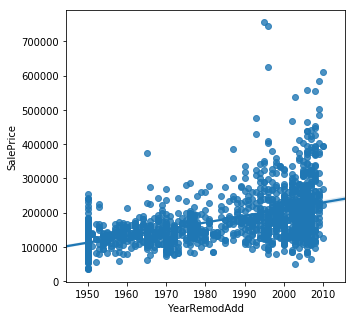

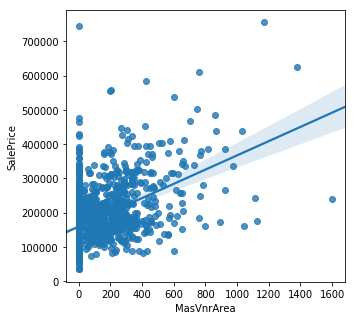

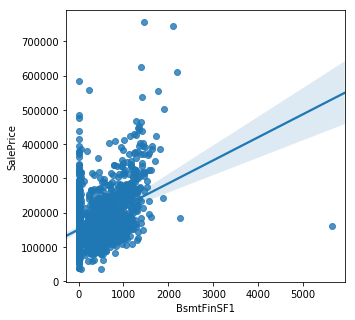

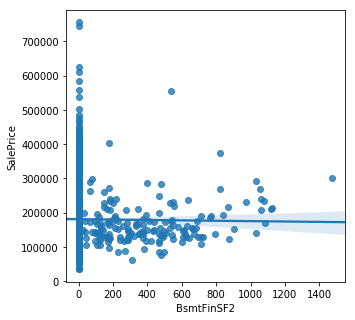

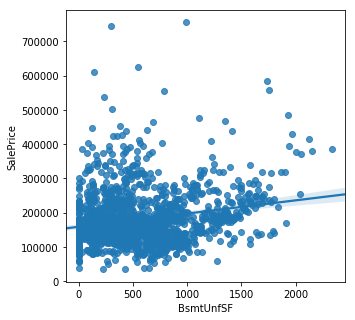

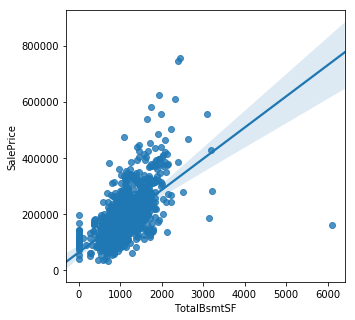

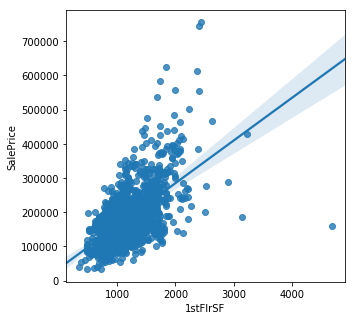

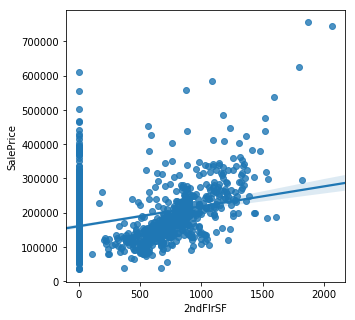

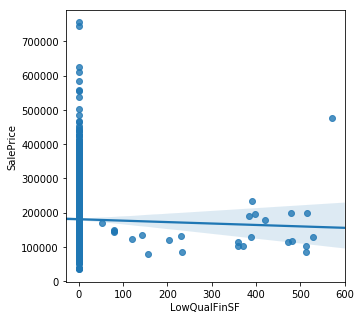

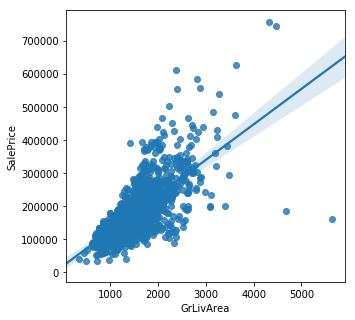

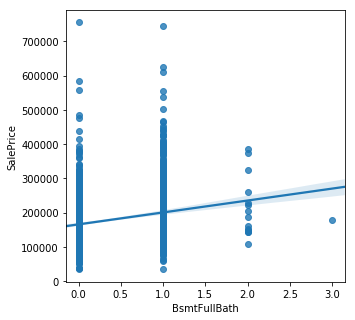

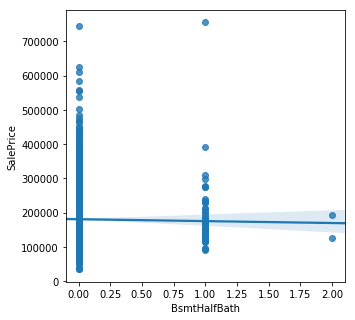

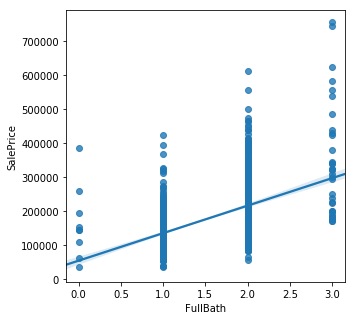

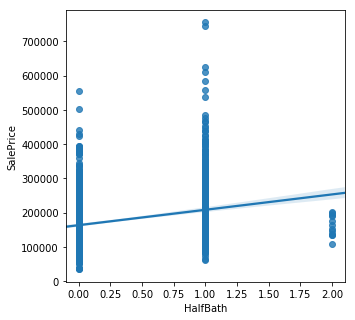

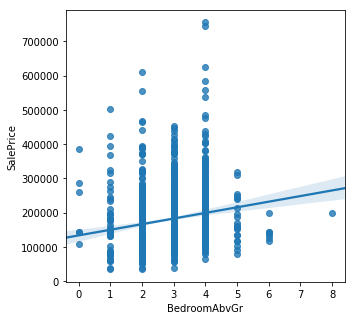

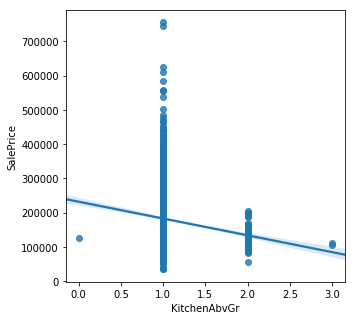

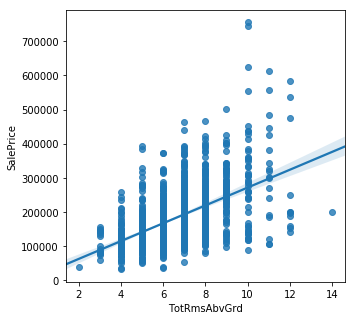

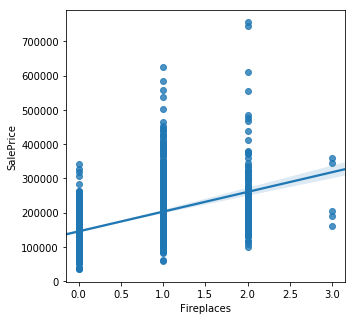

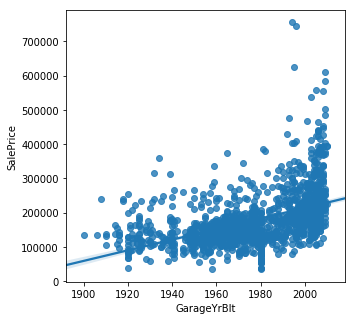

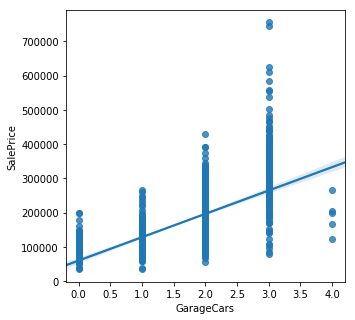

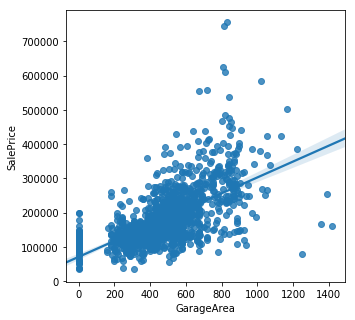

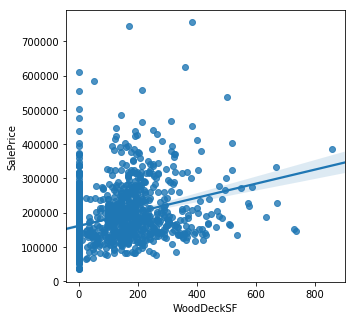

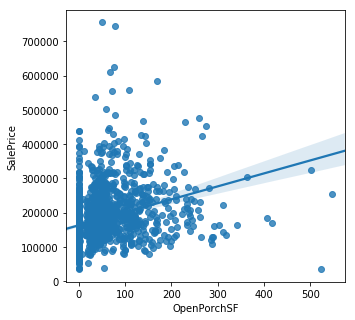

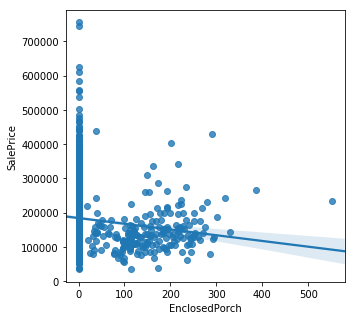

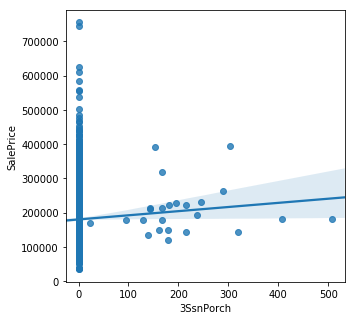

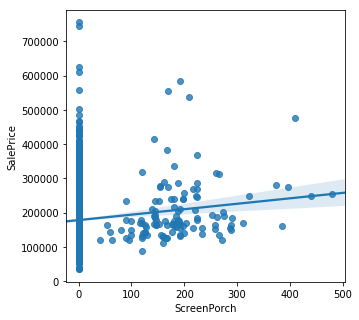

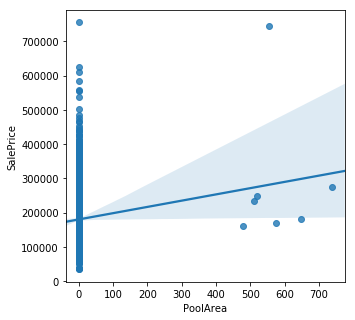

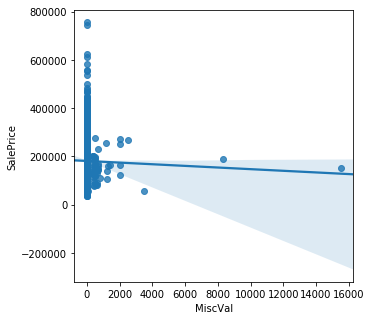

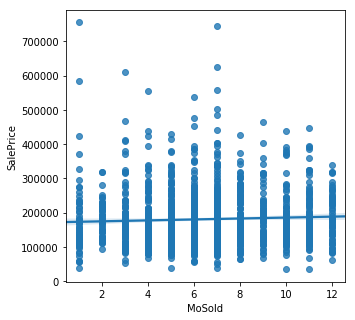

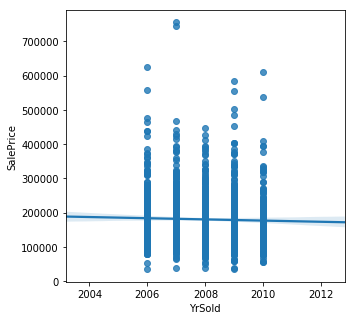

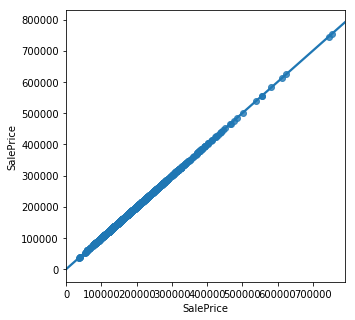

In [7]:
# a = sns.FacetGrid(data=data,col=cont_features)
for col in cont_features:
    fig,ax=plt.subplots(figsize=(5,5))
    sns.regplot(x=col,y='SalePrice', data=data)

I used plots to get an idea of the relationships and the variables that seem necessary. I fixed the outliers in training data before anything else so that I can combine data and then do missing values, feature engineering and encoding on all the data together. Since the data isnt neccesarily ordinal, I will use onehot encode and then do PCA of the whole set together. That way I can try out different models without worrying about cat features. I will do a correlation check before to check if I am taking the right features. I might do another corr after encoding. lets see how this goes.

/home/charlie/environments/PFDS/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


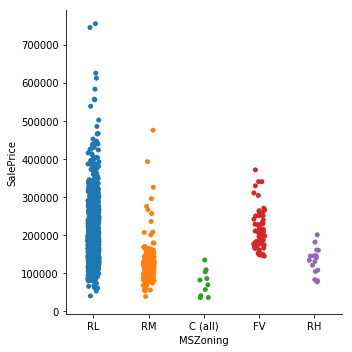

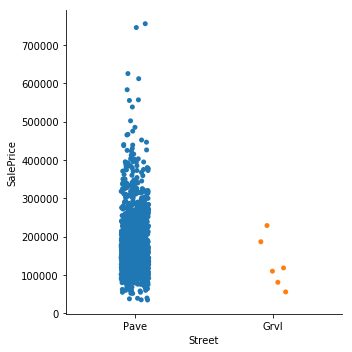

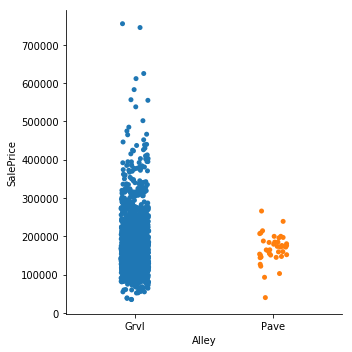

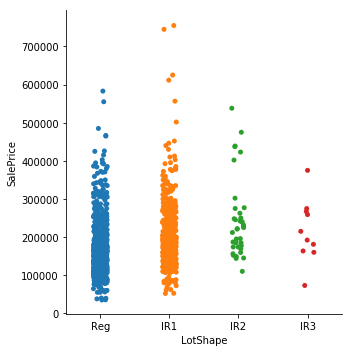

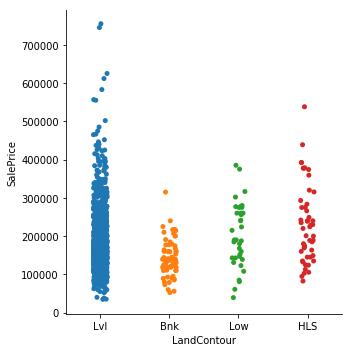

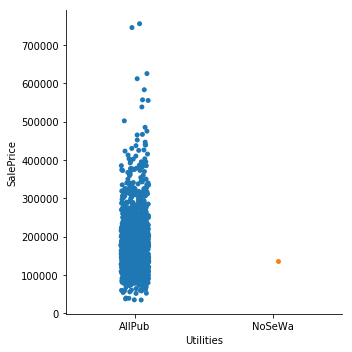

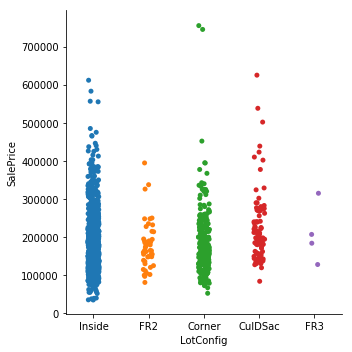

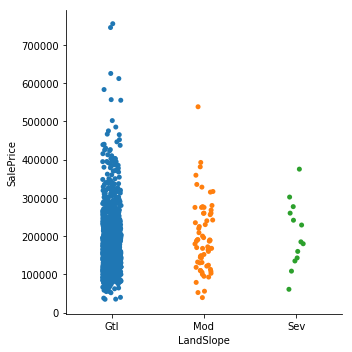

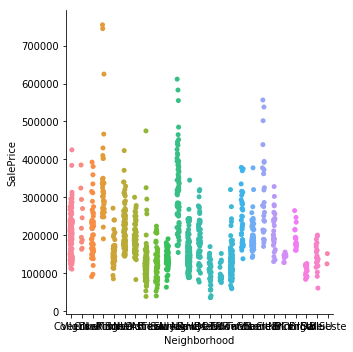

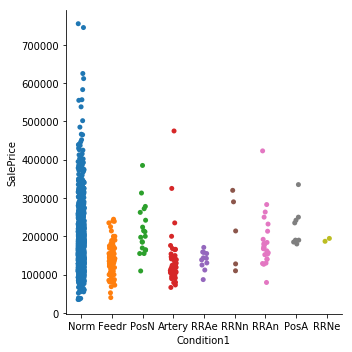

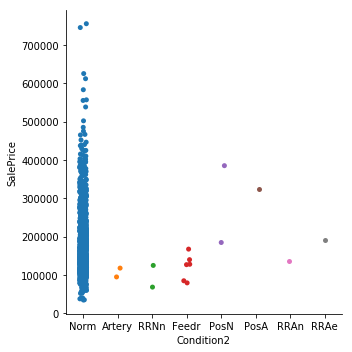

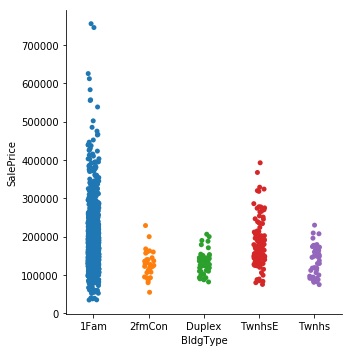

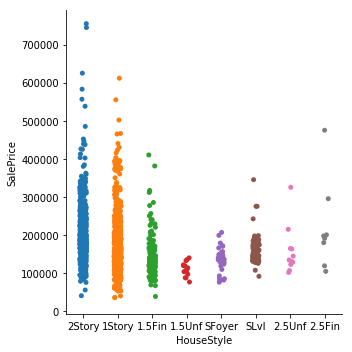

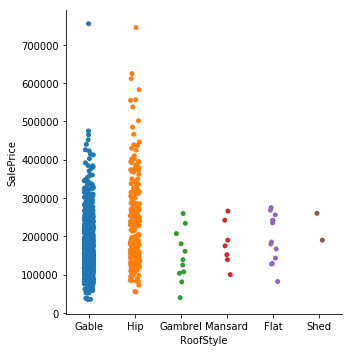

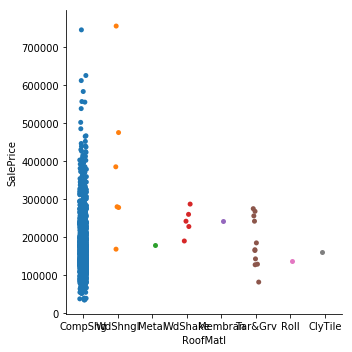

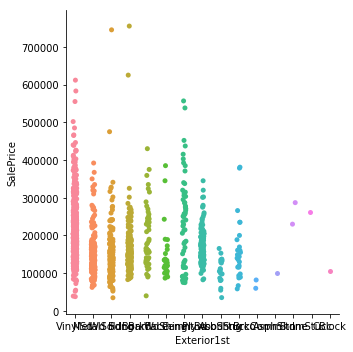

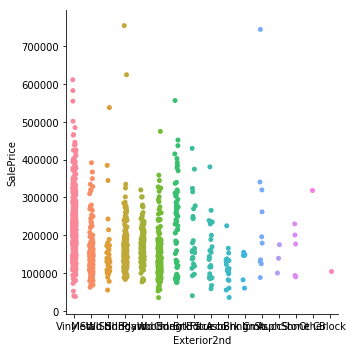

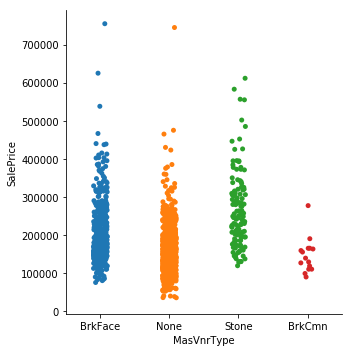

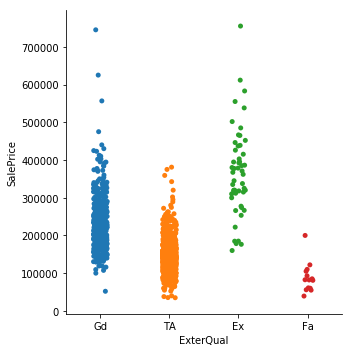

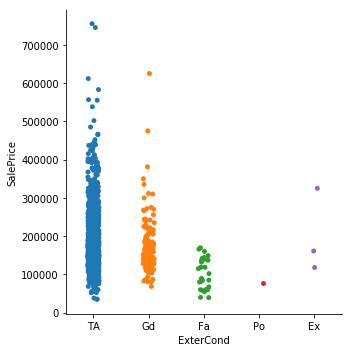

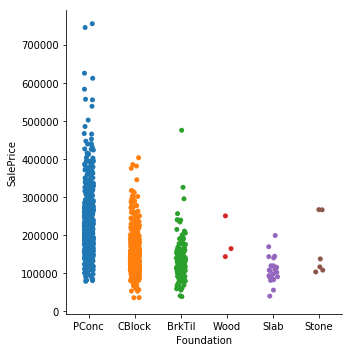

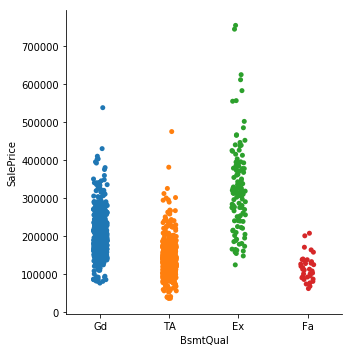

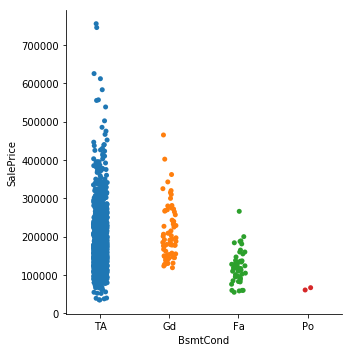

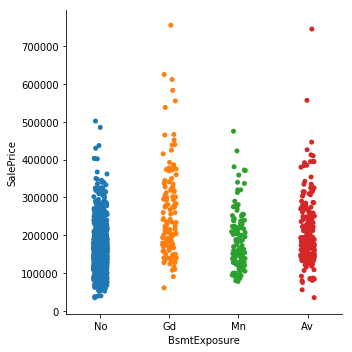

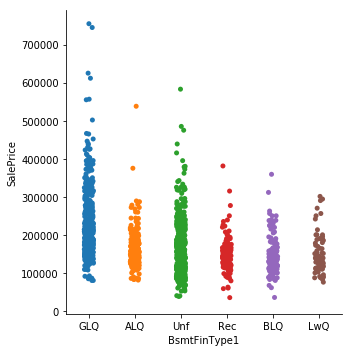

In [ ]:
for col in cat_features:
#     fig,ax=plt.subplots(figsize=(5,5))
    sns.catplot(x=col,y='SalePrice', data=data)

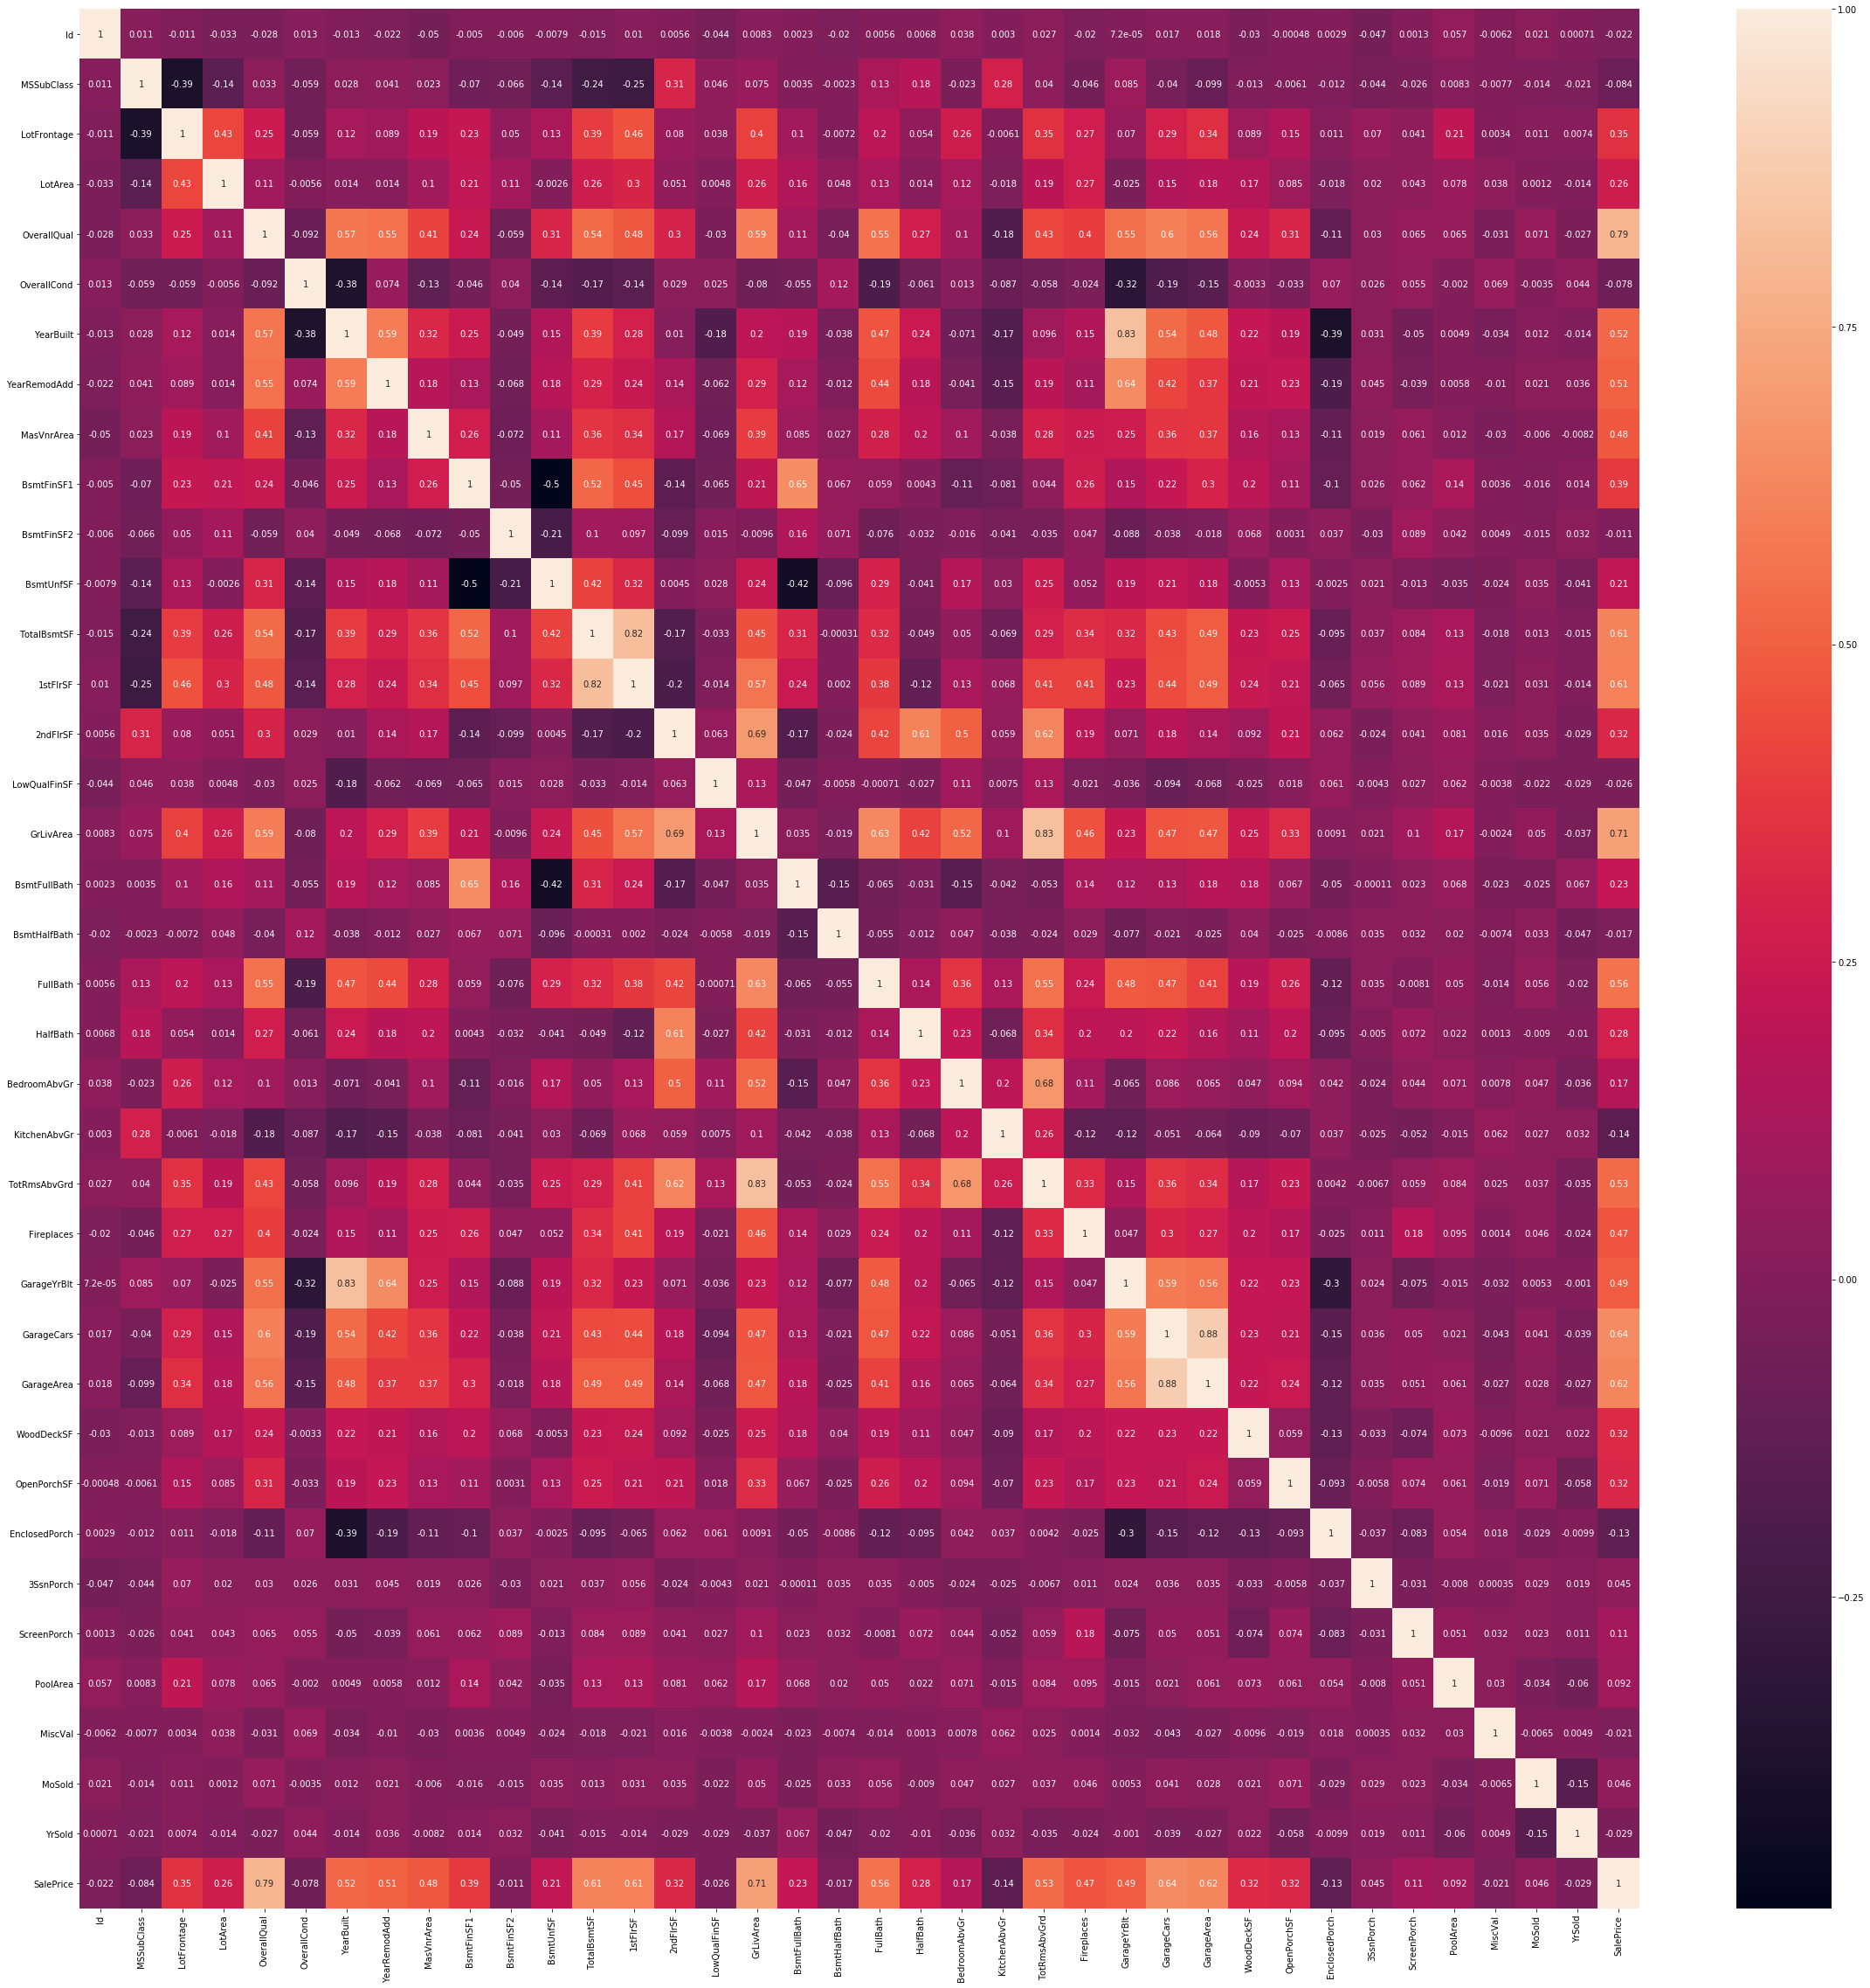

In [4]:
fig, ax=plt.subplots(figsize=(40,40))
sns.heatmap(data.corr(),annot=True)

In [ ]:
keep_cat=['MSZoning','Street','LotShape','LotConfig','Condition1',
        'BldgType','Neighborhood','HouseStyle','Exterior1st','Exterior2nd',
        'BsmtFinType1','Electrical','FireplaceQu','GarageType','SaleType','SaleCondition']

data.LotShape.replace(['IR2','IR3'], 'other', inplace=True)
data.Condition1.replace(['Feedr','Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'],'other',inplace=True)
data.Exterior1st.replace(['CemntBd','BrkFace','WdShing','Stucco','AsbShng',
                        'BrkComm','Stone','AsphShn','CBlock','ImStucc'],'other',inplace=True)
data.Exterior2nd.replace(['CemntBd','BrkFace','Wd Shng','Stucco','AsbShng',
                        'Brk Cmn','Stone','AsphShn','CBlock','other'],'other',inplace=True)
data.Electrical.replace(['FuseA','FuseF','FuseP','Mix'],'other',inplace=True)

data.GarageType.replace(['BuiltIn','Basment','CarPort','2Types'],'other',inplace=True)
data.SaleType.replace(['COD','ConLD','ConLw','ConLi','CWD','Oth','Con'],'other',inplace=True)

data.SaleCondition.replace(['Family','Alloca','AdjLand'],'other',inplace=True)

In [ ]:
#maybe we'l encode like this
def encoder(var):
    return var.astype("category").cat.codes
    

In [ ]:
#just checking relation between garrage building and others 
# sns.relplot(x="GarageYrBlt",y="YearRemodAdd",data=data)

(1460,)
2747.625
(1460,)


/home/charlie/environments/PFDS/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
data.GrLivArea[data.GrLivArea>2747.625]

Series([], Name: GrLivArea, dtype: float64)

In [35]:
data.GrLivArea.iloc[608,]

2747.625

In [ ]:
#function for outliers on train data
#  from scipy.stats import iqr
# def outlierremove(ser)
from numpy import percentile
# print(data.GrLivArea.shape)
def oulierdetectfix(feat):
    
    q25,q75=percentile(feat,25),percentile(feat,75)
    iqr=(q75-q25)
    iqr = q75 - q25

    lower = q25 - (iqr*1.5)
    upper = q75 + (iqr*1.5)
#     print(upper)
    return feat.loc[feat<upper]=upper
# print(data.GrLivArea.shape)
# data.TotalBsmtSF[data.TotalBsmtSF<upper]

In [ ]:
#apply outlier


In [ ]:
#logical fix missing data

In [ ]:
#function for missing all data

In [ ]:
#combine the regfeatures 

In [ ]:
#drop unused reg

In [ ]:
#function for skew detect and fix all data

In [ ]:
#drop unused cat data

In [ ]:
#reduce the items in data logically

In [ ]:
#hot encode

In [ ]:
#Scale

In [ ]:
#PCA

In [ ]:
#model XGboost

In [ ]:
#model lasso

In [ ]:
#ensemble